# Single Image Steganalysis

This notebook explores the idea of steganaylsis - the study of detecting messages hidden using steganography; this is analogous to cryptanalysis applied to cryptography. The application will be on images. This file enables the following functionalities:
* Encoding an image into another image - hide a secret in an image!
* Decode the sed encoded image in order to retrieve the hidden information.

Methodologies:
* We make use of Least Significant Bit (LSB) encoding in order to "hide" the secret image in the visible image.
* We consider each pixel to be represented by 8 bits (in order to achieve a range of 0-255)
* We take the 4 Most Significant Bits of the secret image and "hide" them in 4 Least Significant Bits of the visible image.
* We apply the reverse process in decoding the image.

Requirements:
* python 3.5
* pillow

#### Import Libraries

In [ ]:
import numpy as np
import scipy as sc
from scipy import misc
import matplotlib.pyplot as plt

#### Useful Functions

In [2]:
def read_img(img_path):
    return misc.imread(img_path)

In [3]:
def save_img(img, save_path):
    misc.imsave(save_path, img)

In [31]:
def display_img(img):
    plt.imshow(img)
    plt.show()

In [32]:
def resize(visible_img, secret_img):
    h, w, z = secret_img.shape
    resized_visible_img = sc.misc.imresize(visible_img, (h,w))
    display_img(resized_visible_img)
    return resized_visible_img

#### Core Functionalities

In [33]:
def encode_pixel(visible_pixel, secret_pixel, num_bits=4):
    # zero out 4 ls bits of visible_pixel --> 1
    visible_pixel_zerod_ls = visible_pixel & 0xfff0
    # extract 4 ms bits of secret_pixel --> 2
    secret_pixel_ms = (secret_pixel >> 4) & 0x000f
    # add 2 to 1
    return visible_pixel_zerod_ls + secret_pixel_ms

In [73]:
def decode_pixel(encoded_pixel):
    # extract 4 least significant bits from ecoded_pixel --> 1
    ls_bits = encoded_pixel & 0x000f
    # left shift 1 by 4 --> 2
    pixel_val = ls_bits << 4
    # zero out the 4 ls bits of 2
    pixel_val = pixel_val & 0xfff0
    return pixel_val

In [69]:
def encode(visible_img_path, secret_img_path, save_path, num_bits=4):
    # load both images
    visible_img = np.int32(read_img(visible_img_path))
    secret_img = np.int32(read_img(secret_img_path))
    
    # resize visiable_img to secret_img dimensions
    visible_img = np.int32(resize(visible_img, secret_img))
    
    # iterate through each pixel and encode
    h, w, z = visible_img.shape
    result = np.zeros((h,w,z), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            for k in range(z):
                visible_pixel = visible_img[i,j,k]
                secret_pixel = secret_img[i,j,k]
                result[i,j,k] = encode_pixel(visible_pixel, secret_pixel)
    # display resultant image
    display_img(result)
    return result

In [80]:
def decode(encoded_img, save_path):
    h, w, z = encoded_img.shape
    result = np.zeros((h,w,z), dtype=np.int32)
    for i in range(h):
        for j in range(w):
            for k in range(z):
                result[i,j,k] = decode_pixel(encoded_img[i,j,k])
    result = 255 - np.float32(result)
    display_img(result)
    return result

#### Running Tests

##### Example 1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


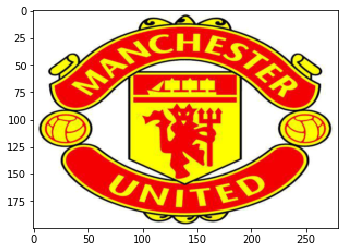

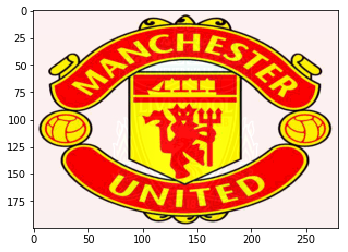

In [81]:
visible_img_path = './data/e1.jpg'
secret_img_path = './data/s1.jpg'

encoded_e1 = encode(visible_img_path, secret_img_path, save_path='')

##### Recovering the hidden image

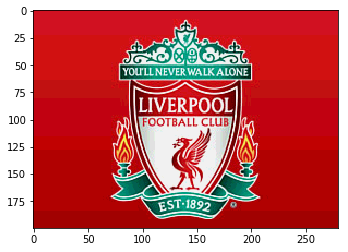

In [82]:
decoded_e1 = decode(encoded_e1, save_path='')

##### Example 2

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


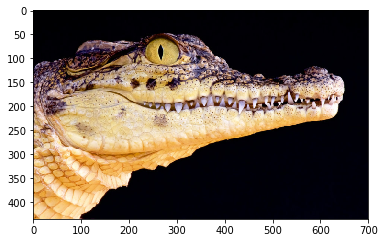

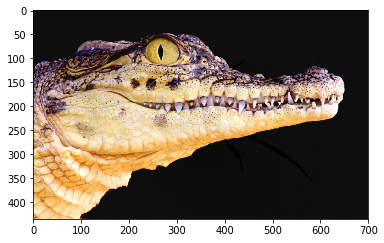

In [83]:
visible_img_path = './data/e2.jpg'
secret_img_path = './data/s2.jpg'

encoded_e1 = encode(visible_img_path, secret_img_path, save_path='')

##### Recovering the hidden image

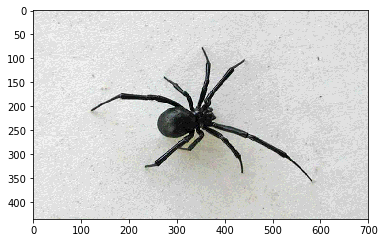

In [84]:
decoded_e1 = decode(encoded_e1, save_path='')

#### Tests to check logic of bit manupilation

In [85]:
visible_pixel = np.int32(0b10000011)
secret_pixel = np.int32(0b11101111)
encoded_pixel = encode_pixel(visible_pixel, secret_pixel)
print("encoded", bin(encoded_pixel))
print(bin(decode_pixel(encoded_pixel)))

encoded 0b10001110
0b11100000
